In [1]:
# importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# importing the data set
df = pd.read_csv('50_Startups.csv')
print(df)

    R&D Spend  Administration  Marketing Spend       State     Profit
0   165349.20       136897.80        471784.10    New York  192261.83
1   162597.70       151377.59        443898.53  California  191792.06
2   153441.51       101145.55        407934.54     Florida  191050.39
3   144372.41       118671.85        383199.62    New York  182901.99
4   142107.34        91391.77        366168.42     Florida  166187.94
5   131876.90        99814.71        362861.36    New York  156991.12
6   134615.46       147198.87        127716.82  California  156122.51
7   130298.13       145530.06        323876.68     Florida  155752.60
8   120542.52       148718.95        311613.29    New York  152211.77
9   123334.88       108679.17        304981.62  California  149759.96
10  101913.08       110594.11        229160.95     Florida  146121.95
11  100671.96        91790.61        249744.55  California  144259.40
12   93863.75       127320.38        249839.44     Florida  141585.52
13   91992.39       

In [3]:
# extracting x and y
x = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

In [4]:
# encoding the categorical data
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(),[3])], remainder = 'passthrough')
x = ct.fit_transform(x)
print(x)

[[0.0 0.0 1.0 165349.2 136897.8 471784.1]
 [1.0 0.0 0.0 162597.7 151377.59 443898.53]
 [0.0 1.0 0.0 153441.51 101145.55 407934.54]
 [0.0 0.0 1.0 144372.41 118671.85 383199.62]
 [0.0 1.0 0.0 142107.34 91391.77 366168.42]
 [0.0 0.0 1.0 131876.9 99814.71 362861.36]
 [1.0 0.0 0.0 134615.46 147198.87 127716.82]
 [0.0 1.0 0.0 130298.13 145530.06 323876.68]
 [0.0 0.0 1.0 120542.52 148718.95 311613.29]
 [1.0 0.0 0.0 123334.88 108679.17 304981.62]
 [0.0 1.0 0.0 101913.08 110594.11 229160.95]
 [1.0 0.0 0.0 100671.96 91790.61 249744.55]
 [0.0 1.0 0.0 93863.75 127320.38 249839.44]
 [1.0 0.0 0.0 91992.39 135495.07 252664.93]
 [0.0 1.0 0.0 119943.24 156547.42 256512.92]
 [0.0 0.0 1.0 114523.61 122616.84 261776.23]
 [1.0 0.0 0.0 78013.11 121597.55 264346.06]
 [0.0 0.0 1.0 94657.16 145077.58 282574.31]
 [0.0 1.0 0.0 91749.16 114175.79 294919.57]
 [0.0 0.0 1.0 86419.7 153514.11 0.0]
 [1.0 0.0 0.0 76253.86 113867.3 298664.47]
 [0.0 0.0 1.0 78389.47 153773.43 299737.29]
 [0.0 1.0 0.0 73994.56 122782.75 3

In [5]:
# we are splitting x and y into training set and the test set
from sklearn.model_selection import train_test_split
x_tr,x_te,y_tr,y_te = train_test_split(x,y,test_size = 0.2,random_state = 0)

In [6]:
# creating and training the linear regression model
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_tr,y_tr)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [7]:
# predicting the values with the trained model
y_pred = lr.predict(x_te)

In [8]:
# printing the r^2 score and the erors of our trained model
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
print(mean_absolute_error(y_te,y_pred))
mse = mean_squared_error(y_te,y_pred)
print(mse)
print(r2_score(y_te,y_pred))
print(np.sqrt(mse))

7514.293659641278
83502864.03260367
0.934706847328222
9137.990152796383


# keep this in mind that we have trained our model with 5 input variables(excludin 1 dummy variable) meaning the best fit regression line is calculated using 5 columns and here we are trying to plot the regression line for just one columns. this ends up making the regression line in the plot in a zig-zag format

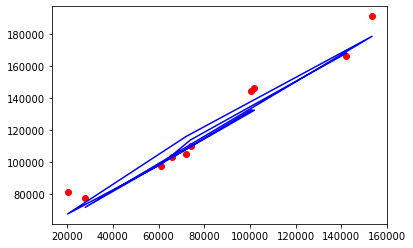

In [9]:
# no. of dimensions in the dataset = 7(including dummy variables and y) and 4(excluding only dummy variables)
# here i will be making a pair or a combination of the Rnd(x[:,3]) and the profit(y)
plt.scatter(x_te[:,3],y_te,c = 'red')
plt.plot(x_te[:,3],y_pred, c= 'blue')
plt.show()

# Backward Elimination(step by step manually)

## preparing the dataset for backward elimination. I.E. removing the dummy variable from x and adding the const value column

In [10]:
x_copy = x[:,1:]
print(x_copy)

[[0.0 1.0 165349.2 136897.8 471784.1]
 [0.0 0.0 162597.7 151377.59 443898.53]
 [1.0 0.0 153441.51 101145.55 407934.54]
 [0.0 1.0 144372.41 118671.85 383199.62]
 [1.0 0.0 142107.34 91391.77 366168.42]
 [0.0 1.0 131876.9 99814.71 362861.36]
 [0.0 0.0 134615.46 147198.87 127716.82]
 [1.0 0.0 130298.13 145530.06 323876.68]
 [0.0 1.0 120542.52 148718.95 311613.29]
 [0.0 0.0 123334.88 108679.17 304981.62]
 [1.0 0.0 101913.08 110594.11 229160.95]
 [0.0 0.0 100671.96 91790.61 249744.55]
 [1.0 0.0 93863.75 127320.38 249839.44]
 [0.0 0.0 91992.39 135495.07 252664.93]
 [1.0 0.0 119943.24 156547.42 256512.92]
 [0.0 1.0 114523.61 122616.84 261776.23]
 [0.0 0.0 78013.11 121597.55 264346.06]
 [0.0 1.0 94657.16 145077.58 282574.31]
 [1.0 0.0 91749.16 114175.79 294919.57]
 [0.0 1.0 86419.7 153514.11 0.0]
 [0.0 0.0 76253.86 113867.3 298664.47]
 [0.0 1.0 78389.47 153773.43 299737.29]
 [1.0 0.0 73994.56 122782.75 303319.26]
 [1.0 0.0 67532.53 105751.03 304768.73]
 [0.0 1.0 77044.01 99281.34 140574.81]
 [0

In [11]:
# creating the constant column using numpy library
const = np.ones((50,1)).astype(int)
print(const)

[[1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]]


In [12]:
# appending the const column in the x_copy
# for the axis argument we use 0 if we want to join the two array row wise or horizontally
# axis = 1 is to join the two arrays vertically or column wise
x_copy = np.append(arr = const, values=x_copy, axis=1)
print(x_copy)

[[1 0.0 1.0 165349.2 136897.8 471784.1]
 [1 0.0 0.0 162597.7 151377.59 443898.53]
 [1 1.0 0.0 153441.51 101145.55 407934.54]
 [1 0.0 1.0 144372.41 118671.85 383199.62]
 [1 1.0 0.0 142107.34 91391.77 366168.42]
 [1 0.0 1.0 131876.9 99814.71 362861.36]
 [1 0.0 0.0 134615.46 147198.87 127716.82]
 [1 1.0 0.0 130298.13 145530.06 323876.68]
 [1 0.0 1.0 120542.52 148718.95 311613.29]
 [1 0.0 0.0 123334.88 108679.17 304981.62]
 [1 1.0 0.0 101913.08 110594.11 229160.95]
 [1 0.0 0.0 100671.96 91790.61 249744.55]
 [1 1.0 0.0 93863.75 127320.38 249839.44]
 [1 0.0 0.0 91992.39 135495.07 252664.93]
 [1 1.0 0.0 119943.24 156547.42 256512.92]
 [1 0.0 1.0 114523.61 122616.84 261776.23]
 [1 0.0 0.0 78013.11 121597.55 264346.06]
 [1 0.0 1.0 94657.16 145077.58 282574.31]
 [1 1.0 0.0 91749.16 114175.79 294919.57]
 [1 0.0 1.0 86419.7 153514.11 0.0]
 [1 0.0 0.0 76253.86 113867.3 298664.47]
 [1 0.0 1.0 78389.47 153773.43 299737.29]
 [1 1.0 0.0 73994.56 122782.75 303319.26]
 [1 1.0 0.0 67532.53 105751.03 30476

In [13]:
# i am creating another copy of the x_copy array which will contain the final most optimal columns
x_opt = np.array(x_copy[:,[0,1,2,3,4,5]],dtype = float)

In [14]:
# importing the library which help us to calculate the p-values of the columns
import statsmodels.api as sm
p_val = sm.OLS(endog= y,exog = x_opt).fit()
p_val.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     169.9
Date:                Tue, 25 Aug 2020   Prob (F-statistic):           1.34e-27
Time:                        19:04:50   Log-Likelihood:                -525.38
No. Observations:                  50   AIC:                             1063.
Df Residuals:                      44   BIC:                             1074.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.013e+04   6884.820      7.281      0.000    3.62e+04     6.4e+04
x1           198.7888   3371.007      0.059      0.953   -6595.030    6992.607
x2           -41.8870   3256.039     -0.013      0.990   -6604.003    6520.229
x3             0.8060      0.046     17.369      0.000       0.712       0.900
x4            -0.0270      0.052     -0.517      0.608      -0.132       0.078
x5             0.0270      0.017      1.574      0.123      -0.008       0.062
==============================================================================
Omnibus:                       14.782   Durbin-Watson:                   1.283
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.266
Skew:                          -0.948   Prob(JB):                     2.41e-05
Kurtosis:                       5.572   Cond. No.                     1.45e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.45e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [15]:
x_opt = np.array(x_copy[:,[0,1,3,4,5]],dtype = float)
p_val = sm.OLS(endog= y,exog = x_opt).fit()
p_val.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     217.2
Date:                Tue, 25 Aug 2020   Prob (F-statistic):           8.49e-29
Time:                        19:10:34   Log-Likelihood:                -525.38
No. Observations:                  50   AIC:                             1061.
Df Residuals:                      45   BIC:                             1070.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.011e+04   6647.870      7.537      0.000    3.67e+04    6.35e+04
x1           220.1585   2900.536      0.076      0.940   -5621.821    6062.138
x2             0.8060      0.046     17.606      0.000       0.714       0.898
x3            -0.0270      0.052     -0.523      0.604      -0.131       0.077
x4             0.0270      0.017      1.592      0.118      -0.007       0.061
==============================================================================
Omnibus:                       14.758   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.172
Skew:                          -0.948   Prob(JB):                     2.53e-05
Kurtosis:                       5.563   Cond. No.                     1.40e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [16]:
x_opt = np.array(x_copy[:,[0,3,4,5]],dtype = float)
p_val = sm.OLS(endog= y,exog = x_opt).fit()
p_val.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Tue, 25 Aug 2020   Prob (F-statistic):           4.53e-30
Time:                        19:12:16   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.012e+04   6572.353      7.626      0.000    3.69e+04    6.34e+04
x1             0.8057      0.045     17.846      0.000       0.715       0.897
x2            -0.0268      0.051     -0.526      0.602      -0.130       0.076
x3             0.0272      0.016      1.655      0.105      -0.006       0.060
==============================================================================
Omnibus:                       14.838   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.442
Skew:                          -0.949   Prob(JB):                     2.21e-05
Kurtosis:                       5.586   Cond. No.                     1.40e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [17]:
x_opt = np.array(x_copy[:,[0,3,5]],dtype = float)
p_val = sm.OLS(endog= y,exog = x_opt).fit()
p_val.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     450.8
Date:                Tue, 25 Aug 2020   Prob (F-statistic):           2.16e-31
Time:                        19:12:47   Log-Likelihood:                -525.54
No. Observations:                  50   AIC:                             1057.
Df Residuals:                      47   BIC:                             1063.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.698e+04   2689.933     17.464      0.000    4.16e+04    5.24e+04
x1             0.7966      0.041     19.266      0.000       0.713       0.880
x2             0.0299      0.016      1.927      0.060      -0.001       0.061
==============================================================================
Omnibus:                       14.677   Durbin-Watson:                   1.257
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.161
Skew:                          -0.939   Prob(JB):                     2.54e-05
Kurtosis:                       5.575   Cond. No.                     5.32e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.32e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [18]:
x_opt = np.array(x_copy[:,[0,3]],dtype = float)
p_val = sm.OLS(endog= y,exog = x_opt).fit()
p_val.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     849.8
Date:                Tue, 25 Aug 2020   Prob (F-statistic):           3.50e-32
Time:                        19:13:17   Log-Likelihood:                -527.44
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      48   BIC:                             1063.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.903e+04   2537.897     19.320      0.000    4.39e+04    5.41e+04
x1             0.8543      0.029     29.151      0.000       0.795       0.913
==============================================================================
Omnibus:                       13.727   Durbin-Watson:                   1.116
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               18.536
Skew:                          -0.911   Prob(JB):                     9.44e-05
Kurtosis:                       5.361   Cond. No.                     1.65e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.65e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [19]:
print(x_opt)

[[1.0000000e+00 1.6534920e+05]
 [1.0000000e+00 1.6259770e+05]
 [1.0000000e+00 1.5344151e+05]
 [1.0000000e+00 1.4437241e+05]
 [1.0000000e+00 1.4210734e+05]
 [1.0000000e+00 1.3187690e+05]
 [1.0000000e+00 1.3461546e+05]
 [1.0000000e+00 1.3029813e+05]
 [1.0000000e+00 1.2054252e+05]
 [1.0000000e+00 1.2333488e+05]
 [1.0000000e+00 1.0191308e+05]
 [1.0000000e+00 1.0067196e+05]
 [1.0000000e+00 9.3863750e+04]
 [1.0000000e+00 9.1992390e+04]
 [1.0000000e+00 1.1994324e+05]
 [1.0000000e+00 1.1452361e+05]
 [1.0000000e+00 7.8013110e+04]
 [1.0000000e+00 9.4657160e+04]
 [1.0000000e+00 9.1749160e+04]
 [1.0000000e+00 8.6419700e+04]
 [1.0000000e+00 7.6253860e+04]
 [1.0000000e+00 7.8389470e+04]
 [1.0000000e+00 7.3994560e+04]
 [1.0000000e+00 6.7532530e+04]
 [1.0000000e+00 7.7044010e+04]
 [1.0000000e+00 6.4664710e+04]
 [1.0000000e+00 7.5328870e+04]
 [1.0000000e+00 7.2107600e+04]
 [1.0000000e+00 6.6051520e+04]
 [1.0000000e+00 6.5605480e+04]
 [1.0000000e+00 6.1994480e+04]
 [1.0000000e+00 6.1136380e+04]
 [1.0000

In [20]:
# splitting the x_opt and y into training and test set for our MLR model
xtr,xte,ytr,yte = train_test_split(x_opt,y,test_size = 0.2,random_state=0)

In [21]:
# train my MLR model
opt_reg = LinearRegression()
opt_reg.fit(xtr,ytr)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [22]:
y_pr = opt_reg.predict(xte)

In [23]:
print(mean_absolute_error(yte,y_pr))
mse = mean_squared_error(yte,y_pr)
print(mse)
print(r2_score(yte,y_pr))
print(np.sqrt(mse))

6772.453280477901
68473440.71905926
0.946458760778722
8274.868018225987


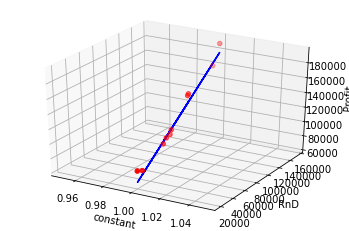

In [25]:
# 3D plotting in python
from mpl_toolkits import mplot3d
# to plot a 3D plot we create a 3D suplot on a matplotlib figure
ax = plt.figure().add_subplot(projection = '3d')
ax.scatter3D(xte[:,0],xte[:,1],yte,c='red')
ax.plot3D(xte[:,0],xte[:,1],y_pr,c='blue')
ax.set_xlabel('constant')
ax.set_ylabel('RnD')
ax.set_zlabel('Profit')
plt.show()